- Maggie Wolff
- CSC 578
- Fall 2021
- Final Class Project 
- November 22, 2021



In [ ]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#mpl.rcParams['figure.figsize'] = (8, 6)
#mpl.rcParams['axes.grid'] = False

# Data Exploration
- description of variables
- plots and histograms
- analysis/comments on the distribution.

In [ ]:
pd.reset_option("display.max_rows")

csv_path = tf.keras.utils.get_file(
    origin='https://reed.cs.depaul.edu/peterh/Essays/Metro_Interstate_reduced.csv',
    fname='Metro_Interstate_reduced.csv',
    cache_dir='/content', cache_subdir='sample_data')

csv_path
df = pd.read_csv(csv_path)
df.head()

2719744/2703553 [==============================] - 0s 0us/step


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              40575 non-null  object 
 1   temp                 40575 non-null  float64
 2   rain_1h              40575 non-null  float64
 3   snow_1h              40575 non-null  float64
 4   clouds_all           40575 non-null  int64  
 5   weather_main         40575 non-null  object 
 6   weather_description  40575 non-null  object 
 7   date_time            40575 non-null  object 
 8   traffic_volume       40575 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.8+ MB


In [ ]:
#change date_time from object to proper date time format 
df['date_time'] = pd.to_datetime(df['date_time'])

#create columns for hour, day of week, month
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp                 40575 non-null  float64       
 2   rain_1h              40575 non-null  float64       
 3   snow_1h              40575 non-null  float64       
 4   clouds_all           40575 non-null  int64         
 5   weather_main         40575 non-null  object        
 6   weather_description  40575 non-null  object        
 7   date_time            40575 non-null  datetime64[ns]
 8   traffic_volume       40575 non-null  int64         
 9   hour                 40575 non-null  int64         
 10  dayofweek            40575 non-null  int64         
 11  month                40575 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,dayofweek,month
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474,11.514750,3.006778,6.489045
std,13.816618,48.812640,0.005676,38.683447,1984.772909,6.949889,1.998947,3.373618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000,5.000000,1.000000,4.000000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000,12.000000,3.000000,7.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000,18.000000,5.000000,9.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000,23.000000,6.000000,12.000000


- Min temp absolute 0 - impossible
- Median temp 282 (48F) and Max temp 310 (98F) 
- Max rainfall in 1h = 9,831 mm = 387 inches - impossible 

Fix outliers for the sake of visulizations 

In [ ]:
# fix impossible rainfall amounts to more likely values 
df.loc[df['rain_1h']>250, 'rain_1h'] = df['rain_1h']/100
df.loc[df['rain_1h']>25]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month
5850,None,295.82,44.450,0.0,76,Rain,very heavy rain,2013-06-24 11:00:00,4802,11,0,6
6317,None,292.65,25.320,0.0,8,Rain,very heavy rain,2013-07-14 06:00:00,958,6,6,7
6854,None,289.10,55.630,0.0,68,Rain,very heavy rain,2013-08-07 02:00:00,315,2,2,8
9127,None,264.50,28.700,0.0,64,Rain,very heavy rain,2013-12-19 23:00:00,1190,23,3,12
14333,None,292.02,27.570,0.0,90,Rain,very heavy rain,2015-07-13 00:00:00,492,0,0,7
15166,None,294.49,25.460,0.0,90,Rain,very heavy rain,2015-08-16 21:00:00,2118,21,6,8
21224,None,302.11,98.313,0.0,75,Rain,very heavy rain,2016-07-11 17:00:00,5535,17,0,7
22082,None,297.71,31.750,0.0,0,Rain,very heavy rain,2016-08-16 17:00:00,4913,17,1,8


In [ ]:
# fix 0 temp values to average of before/after 

df.loc[(df['date_time'].dt.to_period('D')=='2014-02-02') & (df['temp']==0), 'temp'] = (255.37+255.62)/2
df.loc[(df['date_time'].dt.to_period('D')=='2014-01-31') & (df['temp']==0), 'temp'] = 255.93

In [ ]:
# check for missing traffic volume
df.loc[df['traffic_volume']==0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month
21507,None,296.68,0.0,0.0,40,Rain,light rain,2016-07-23 18:00:00,0,18,5,7
21512,None,295.90,0.0,0.0,90,Haze,haze,2016-07-23 23:00:00,0,23,5,7


Only two observations missing traffic volume, should not impact performance 

In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,dayofweek,month
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.379775,0.078755,0.000117,44.199162,3290.650474,11.514750,3.006778,6.489045
std,13.097795,0.911134,0.005676,38.683447,1984.772909,6.949889,1.998947,3.373618
min,243.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000,5.000000,1.000000,4.000000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000,12.000000,3.000000,7.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000,18.000000,5.000000,9.000000
max,310.070000,98.313000,0.510000,100.000000,7280.000000,23.000000,6.000000,12.000000


Text(0.5, 1.0, 'median hourly traffic volume by day')

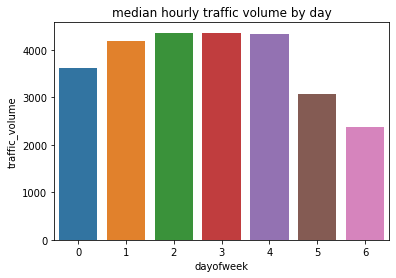

In [ ]:
# traffic by day of week
sns.barplot(y="traffic_volume", x="dayofweek", data=df.groupby('dayofweek')['traffic_volume'].median().to_frame().reset_index())
plt.title('median hourly traffic volume by day')

Text(0.5, 1.0, 'median hourly traffic volume by month of year')

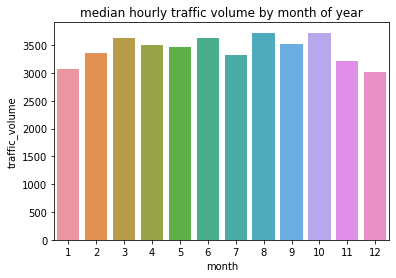

In [ ]:
# traffic by month
sns.barplot(y="traffic_volume", x="month", data=df.groupby('month')['traffic_volume'].median().to_frame().reset_index())
plt.title('median hourly traffic volume by month of year')

Text(0.5, 1.0, 'median hourly traffic volume by hour of day')

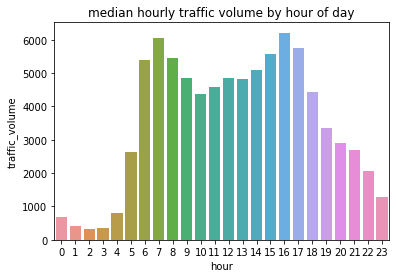

In [ ]:
# traffic by time of day
sns.barplot(y="traffic_volume", x="hour", data=df.groupby('hour')['traffic_volume'].median().to_frame().reset_index())
plt.title('median hourly traffic volume by hour of day')

,date_time,traffic_volume
holiday,,
Christmas Day,5,846.600000
Columbus Day,5,519.400000
Independence Day,5,1076.000000
Labor Day,5,1013.200000
Martin Luther King Jr Day,3,592.666667
Memorial Day,5,1107.600000
New Years Day,5,1324.600000
None,40522,3293.824416
State Fair,5,634.800000


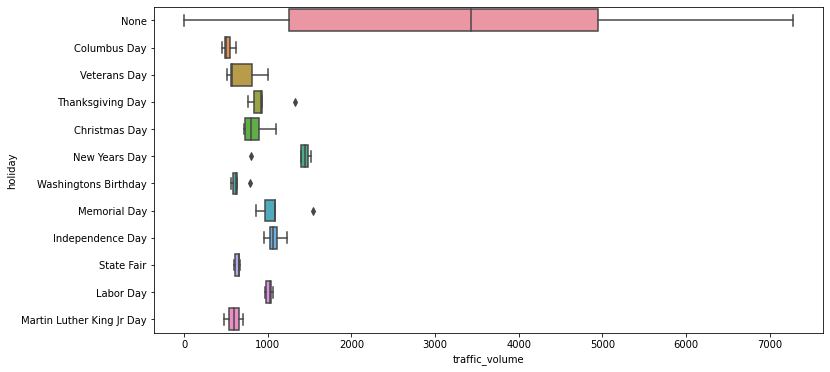

In [ ]:
# how many observations and average traffic by holiday 

plt.figure(figsize=(12, 6))
ax = sns.boxplot(y='holiday', x='traffic_volume', data=df, showfliers = True)

df.groupby('holiday').agg({'date_time':'count', 'traffic_volume':'mean'})

,date_time,traffic_volume
weather_main,,
Clear,13366,3055.254751
Clouds,15123,3616.988230
Drizzle,515,3159.821359
Fog,201,2724.442786
Haze,766,3597.939948
Mist,3069,2854.214076
Rain,4769,3355.270287
Smoke,15,2559.666667
Snow,2297,3001.861123


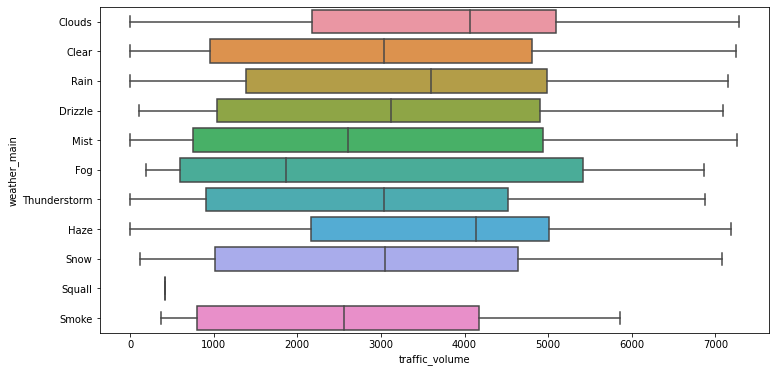

In [ ]:
# how many observations per weather type 
# sns.histplot(data=df, y="weather_main")
# plt.title('observations per weather_main')
# plt.xticks(rotation=45)

plt.figure(figsize=(12, 6))
ax = sns.boxplot(y='weather_main', x='traffic_volume', data=df, showfliers = True)

df.groupby('weather_main').agg({'date_time':'count', 'traffic_volume':'mean'})

In [ ]:
print('observations with measurable rain:  ', df.loc[df['rain_1h']>0].shape[0])
print('percent of obs with measurable rain:', df.loc[df['rain_1h']>0].shape[0]/df.shape[0]*100)

observations with measurable rain:   2054
percent of obs with measurable rain: 5.062230437461491


In [ ]:
print('observations with measurable snow:  ', df.loc[df['snow_1h']>0].shape[0])
print('percent of obs with measurable snow:', df.loc[df['snow_1h']>0].shape[0]/df.shape[0]*100)

observations with measurable snow:   31
percent of obs with measurable snow: 0.07640172520024646


Number of observations with measurable rain and snow does not match the number of observations by categorical labels 

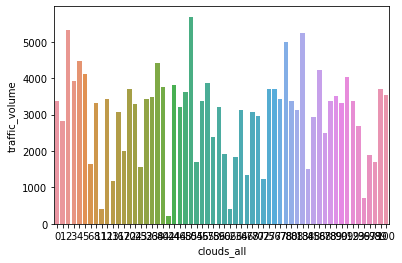

In [ ]:
# does cloud cover have an impact on traffic volume? 
sns.barplot(y="traffic_volume", x="clouds_all", data=df.groupby('clouds_all')['traffic_volume'].mean().to_frame().reset_index())

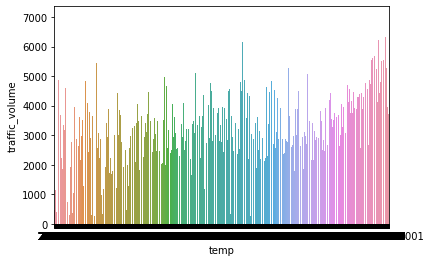

In [ ]:
# does temp have an impact on traffic volume? 
sns.barplot(y="traffic_volume", x="temp", data=df.groupby('temp')['traffic_volume'].mean().to_frame().reset_index())

Looks like more traffic volume when the temp is warmer (during summer months)

In [ ]:
df.groupby('weather_description').agg({'date_time':'count', 'traffic_volume':'mean'}).sort_values('date_time', ascending=False)

,date_time,traffic_volume
weather_description,,
sky is clear,11642,3000.910067
overcast clouds,5072,3375.779771
broken clouds,4650,3658.193978
scattered clouds,3451,3876.298464
mist,3069,2854.214076
light rain,2831,3389.292476
few clouds,1950,3687.205128
Sky is Clear,1724,3422.238979
light snow,1588,3060.358942


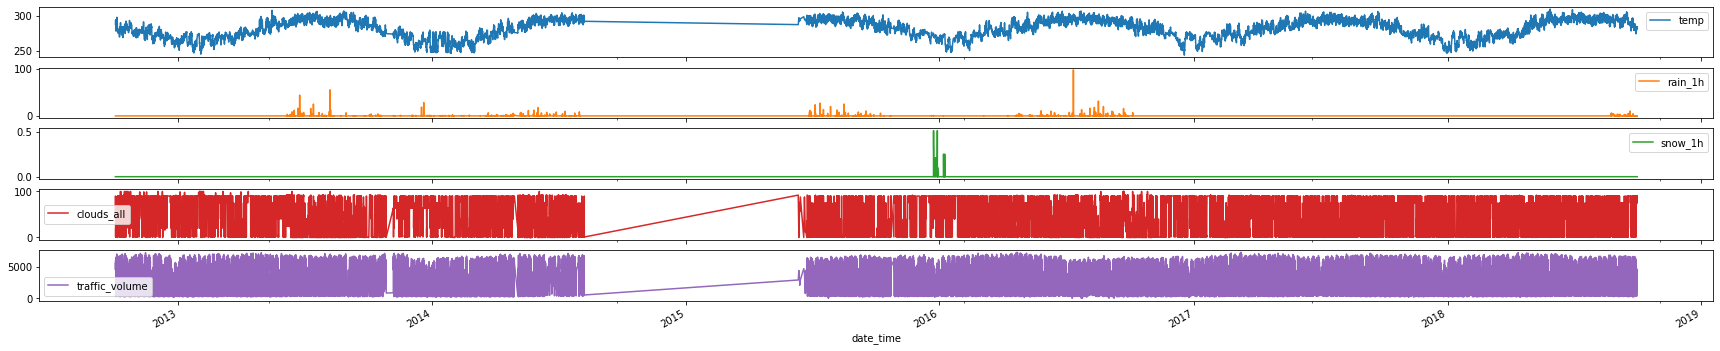

In [ ]:
##From the TensorFlow Tutorial

# visualize numeric values over time 

plot_cols = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
plot_features = df[plot_cols]
plot_features.index = df['date_time']
_ = plot_features.plot(subplots=True, figsize=(30,6))

Missing data from Augst 2014 - July 2015

# Comments on Exploratory Data Analysis
- missing data from August 2014 - July 2015
- a few extreme high or low values for temp and rain, fixed 
- significantly more observations labeled with "rain" or "snow" than listing rainfall or snowfall above 0. 
- the most noticeable patterns for traffic volume seem to be based on, roughly in order: 
1. Time of Day
2. Day of Week
3. Holiday or None 
4. Month of Year 
5. Temp
6. Weather category 

Traffic volume is more impacted by commute patterns (to work/school on weekdays with no holidays), with weather having a small effect. 

# Data Cleaning and further Exploration 

In [ ]:
# create binary column for Holidays 
df['d_holiday'] = np.where(df['holiday']!='None', 1, 0)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month,d_holiday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10,0


In [ ]:
# create binary for workday (weekday and not holiday)
df['workday'] = np.where((df['holiday']=='None') & (df['dayofweek']<5) , 1, 0)
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month,d_holiday,workday
40570,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9,0,0
40571,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9,0,0
40572,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9,0,0
40573,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9,0,0
40574,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954,23,6,9,0,0


In [ ]:
# create binary column for rush hour
df['morning_rush'] = np.where((df['workday']==1) & (df['hour']>5) & (df['hour']<10) , 1, 0)
df['evening_rush'] = np.where((df['workday']==1) & (df['hour']>13) & (df['hour']<18) , 1, 0)
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10,0,1,1,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10,0,1,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10,0,1,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10,0,1,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10,0,1,0,0


In [ ]:
# clean up the weather_description 
df.loc[(df['weather_description']=='freezing rain'),'weather_description']='snow'
df.loc[(df['weather_description']=='sleet'),'weather_description']='snow'
df.loc[(df['weather_description']=='proximity thunderstorm with drizzle'),'weather_description']='light rain'
df.loc[(df['weather_description']=='drizzle'),'weather_description']='light rain'
df.loc[(df['weather_description']=='thunderstorm with light drizzle'),'weather_description']='light rain'
df.loc[(df['weather_description']=='light rain and snow'),'weather_description']='light snow'
df.loc[(df['weather_description']=='thunderstorm with rain'),'weather_description']='rain'
df.loc[(df['weather_description']=='proximity thunderstorm with rain'),'weather_description']='rain'
df.loc[(df['weather_description']=='light shower snow'),'weather_description']='light snow'
df.loc[(df['weather_description']=='light intensity shower rain'),'weather_description']='light rain'
df.loc[(df['weather_description']=='thunderstorm with heavy rain'),'weather_description']='heavy rain'
df.loc[(df['weather_description']=='smoke'),'weather_description']='fog'
df.loc[(df['weather_description']=='heavy intensity drizzle'),'weather_description']='rain'
df.loc[(df['weather_description']=='thunderstorm with light rain'),'weather_description']='light rain'
df.loc[(df['weather_description']=='thunderstorm'),'weather_description']='rain'
df.loc[(df['weather_description']=='proximity shower rain'),'weather_description']='light rain'
df.loc[(df['weather_description']=='SQUALLS'),'weather_description']='heavy rain'
df.loc[(df['weather_description']=='proximity thunderstorm'),'weather_description']='light rain'
df.loc[(df['weather_description']=='light intensity drizzle'),'weather_description']='light rain'
df.loc[(df['weather_description']=='heavy intensity rain'),'weather_description']='heavy rain'
df.loc[(df['weather_description']=='very heavy rain'),'weather_description']='heavy rain'
df.loc[(df['weather_description']=='Sky is Clear'),'weather_description']='none'
df.loc[(df['weather_description']=='sky is clear'),'weather_description']='none'
df.loc[(df['weather_description']=='few clouds'),'weather_description']='none'
df.loc[(df['weather_description']=='scattered clouds'),'weather_description']='none'
df.loc[(df['weather_description']=='broken clouds'),'weather_description']='none'
df.loc[(df['weather_description']=='overcast clouds'),'weather_description']='none'
df.loc[(df['weather_description']=='mist'),'weather_description']='light rain'
df.loc[(df['weather_description']=='moderate rain'),'weather_description']='rain'

df.groupby('weather_description').size()

weather_description
fog             216
haze            766
heavy rain      441
heavy snow      500
light rain     6896
light snow     1602
none          28489
rain           1469
snow            196
dtype: int64

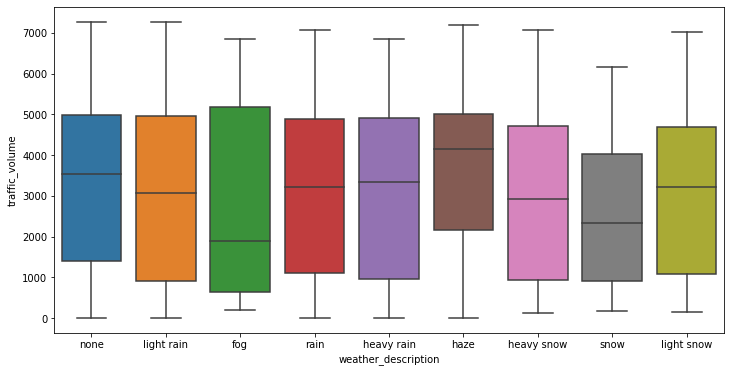

In [ ]:
# traffic by weather 
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='weather_description', y='traffic_volume', data=df, showfliers = True)

In [ ]:
#replace weather with binary values 
d_weather = pd.get_dummies(df['weather_description'])
df = pd.merge(left=df, right=d_weather, left_index=True, right_index=True)
df.drop(columns=['none'], inplace=True)
df.loc[df['weather_description']!='none'].head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow
164,None,287.23,0.0,0.0,100,Rain,light rain,2012-10-09 15:00:00,5777,15,1,10,0,1,0,1,0,0,0,0,1,0,0,0
178,None,281.25,0.0,0.0,99,Rain,light rain,2012-10-10 07:00:00,6793,7,2,10,0,1,1,0,0,0,0,0,1,0,0,0
179,None,280.10,0.0,0.0,99,Rain,light rain,2012-10-10 08:00:00,6283,8,2,10,0,1,1,0,0,0,0,0,1,0,0,0
180,None,279.61,0.0,0.0,99,Rain,light rain,2012-10-10 09:00:00,5680,9,2,10,0,1,1,0,0,0,0,0,1,0,0,0
216,None,283.18,0.0,0.0,72,Drizzle,light rain,2012-10-12 03:00:00,372,3,4,10,0,1,0,0,0,0,0,0,1,0,0,0


# Data Transformations

In [ ]:
##From the TensorFlow Tutorial

day = 24*60*60
year = (365.2425)*day
timestamp_s = df['date_time'].map(pd.Timestamp.timestamp)

df['Day_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow,Day_sin,Day_cos,Year_sin,Year_cos
0,None,288.28,0.0,0.0,40,Clouds,none,2012-10-02 09:00:00,5545,9,1,10,0,1,1,0,0,0,0,0,0,0,0,0,7.071068e-01,-0.707107,-0.999766,0.021642
1,None,289.36,0.0,0.0,75,Clouds,none,2012-10-02 10:00:00,4516,10,1,10,0,1,0,0,0,0,0,0,0,0,0,0,5.000000e-01,-0.866025,-0.999750,0.022358
2,None,289.58,0.0,0.0,90,Clouds,none,2012-10-02 11:00:00,4767,11,1,10,0,1,0,0,0,0,0,0,0,0,0,0,2.588190e-01,-0.965926,-0.999734,0.023075
3,None,290.13,0.0,0.0,90,Clouds,none,2012-10-02 12:00:00,5026,12,1,10,0,1,0,0,0,0,0,0,0,0,0,0,1.143105e-11,-1.000000,-0.999717,0.023791
4,None,291.14,0.0,0.0,75,Clouds,none,2012-10-02 13:00:00,4918,13,1,10,0,1,0,0,0,0,0,0,0,0,0,0,-2.588190e-01,-0.965926,-0.999700,0.024508


Text(0.5, 1.0, 'Time of day signal')

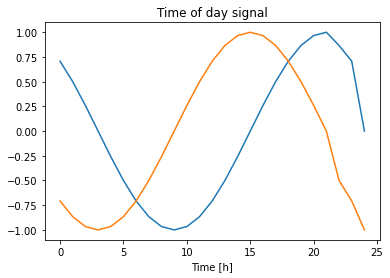

In [ ]:
##From the TensorFlow Tutorial

plt.plot(np.array(df['Day_sin'])[:25])
plt.plot(np.array(df['Day_cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [ ]:
# create numeric data set with encoded categorical columns
df_num2 = df[['traffic_volume', 'temp', 'hour', 'dayofweek', 'month', 'd_holiday', 'workday', 'morning_rush', 'evening_rush', 'Day_sin', 'Day_cos', 'Year_sin', 'Year_cos',
              'fog', 'haze', 'heavy rain', 'heavy snow', 'light rain', 'light snow', 'rain', 'snow']].copy()
df_num2.tail()

,traffic_volume,temp,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,Day_sin,Day_cos,Year_sin,Year_cos,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow
40570,3543,283.45,19,6,9,0,0,0,0,-0.965926,0.258819,-0.999910,-0.013421,0,0,0,0,0,0,0,0
40571,2781,282.76,20,6,9,0,0,0,0,-0.866025,0.500000,-0.999919,-0.012705,0,0,0,0,0,0,0,0
40572,2159,282.73,21,6,9,0,0,0,0,-0.707107,0.707107,-0.999928,-0.011988,0,0,0,0,1,0,0,0
40573,1450,282.09,22,6,9,0,0,0,0,-0.500000,0.866025,-0.999936,-0.011271,0,0,0,0,0,0,0,0
40574,954,282.12,23,6,9,0,0,0,0,-0.258819,0.965926,-0.999944,-0.010554,0,0,0,0,0,0,0,0


# Train / Test Split 
- use dataset with numeric values + encoded categorical values

In [ ]:
# separate last 5000 rows for test set 
test_df = df_num2[-5000:]
train_val_df = df_num2[:-5000]

print(train_val_df.shape)
train_val_df.tail()

(35575, 21)


,traffic_volume,temp,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,Day_sin,Day_cos,Year_sin,Year_cos,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow
35570,1389,271.93,18,0,3,0,1,0,0,-1.000000,-1.206420e-12,0.892506,0.451036,0,0,0,1,0,0,0,0
35571,1117,271.65,19,0,3,0,1,0,0,-0.965926,2.588190e-01,0.892829,0.450397,0,0,0,1,0,0,0,0
35572,844,271.28,20,0,3,0,1,0,0,-0.866025,5.000000e-01,0.893151,0.449757,0,0,0,0,0,0,0,1
35573,753,271.15,21,0,3,0,1,0,0,-0.707107,7.071068e-01,0.893473,0.449116,0,0,0,0,0,0,0,1
35574,694,271.15,22,0,3,0,1,0,0,-0.500000,8.660254e-01,0.893795,0.448476,0,0,0,0,0,0,0,1


In [ ]:
print(test_df.shape)
test_df.head()

(5000, 21)


,traffic_volume,temp,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,Day_sin,Day_cos,Year_sin,Year_cos,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow
35575,599,271.36,23,0,3,0,1,0,0,-2.588190e-01,0.965926,0.894116,0.447835,0,0,0,0,0,1,0,0
35576,308,271.43,0,1,3,0,1,0,0,-3.769765e-12,1.000000,0.894437,0.447194,0,0,0,0,0,1,0,0
35577,242,271.43,1,1,3,0,1,0,0,2.588190e-01,0.965926,0.894757,0.446553,0,0,0,0,0,1,0,0
35578,231,271.36,2,1,3,0,1,0,0,5.000000e-01,0.866025,0.895077,0.445911,0,0,0,0,0,1,0,0
35579,335,271.28,3,1,3,0,1,0,0,7.071068e-01,0.707107,0.895397,0.445270,0,0,0,0,0,1,0,0


In [ ]:
# split remaining rows into train/validation set 

n = len(train_val_df)
train_df = train_val_df[0:int(n*0.7)]
val_df = train_val_df[int(n*0.7):-1]

print(train_df.shape)
train_df.tail()

(24902, 21)


,traffic_volume,temp,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,Day_sin,Day_cos,Year_sin,Year_cos,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow
24897,4165,254.917,18,1,12,0,1,0,0,-1.000000,-1.800374e-12,-0.298944,0.954271,0,0,0,0,0,0,0,0
24898,3145,254.917,19,1,12,0,1,0,0,-0.965926,2.588190e-01,-0.298260,0.954485,0,0,0,0,0,0,0,0
24899,2617,257.960,20,1,12,0,1,0,0,-0.866025,5.000000e-01,-0.297576,0.954698,0,0,0,0,0,0,0,0
24900,3055,258.880,21,1,12,0,1,0,0,-0.707107,7.071068e-01,-0.296891,0.954911,0,0,0,0,0,0,0,0
24901,3738,260.020,22,1,12,0,1,0,0,-0.500000,8.660254e-01,-0.296207,0.955124,0,0,0,0,0,0,0,0


In [ ]:
print(val_df.shape)
val_df.head()

(10672, 21)


,traffic_volume,temp,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,Day_sin,Day_cos,Year_sin,Year_cos,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow
24902,1205,260.42,23,1,12,0,1,0,0,-2.588190e-01,0.965926,-0.295522,0.955336,0,0,0,0,0,0,0,0
24903,587,260.75,0,2,12,0,1,0,0,-4.363718e-12,1.000000,-0.294837,0.955547,0,0,0,0,0,0,0,0
24904,381,260.59,1,2,12,0,1,0,0,2.588190e-01,0.965926,-0.294152,0.955759,0,0,0,0,0,0,0,0
24905,369,260.42,2,2,12,0,1,0,0,5.000000e-01,0.866025,-0.293467,0.955969,0,0,0,0,0,0,0,0
24906,486,260.34,3,2,12,0,1,0,0,7.071068e-01,0.707107,-0.292782,0.956179,0,0,0,0,0,0,0,0


Normalize the data

In [ ]:
##From the TensorFlow Tutorial

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

train_df.head()

,traffic_volume,temp,hour,dayofweek,month,d_holiday,workday,morning_rush,evening_rush,Day_sin,Day_cos,Year_sin,Year_cos,fog,haze,heavy rain,heavy snow,light rain,light snow,rain,snow
0,1.149755,0.541804,-0.360910,-1.003127,0.954818,-0.036975,0.633883,2.750085,-0.366013,1.004831,-1.010283,-1.379525,0.069429,-0.071596,-0.136422,-0.108547,-0.138243,-0.441351,-0.172425,-0.187642,-0.054593
1,0.632510,0.624278,-0.217380,-1.003127,0.954818,-0.036975,0.633883,-0.363610,-0.366013,0.711228,-1.234496,-1.379502,0.070430,-0.071596,-0.136422,-0.108547,-0.138243,-0.441351,-0.172425,-0.187642,-0.054593
2,0.758680,0.641078,-0.073851,-1.003127,0.954818,-0.036975,0.633883,-0.363610,-0.366013,0.369320,-1.375442,-1.379479,0.071431,-0.071596,-0.136422,-0.108547,-0.138243,-0.441351,-0.172425,-0.187642,-0.054593
3,0.888871,0.683078,0.069678,-1.003127,0.954818,-0.036975,0.633883,-0.363610,-0.366013,0.002407,-1.423517,-1.379455,0.072432,-0.071596,-0.136422,-0.108547,-0.138243,-0.441351,-0.172425,-0.187642,-0.054593
4,0.834582,0.760206,0.213207,-1.003127,0.954818,-0.036975,0.633883,-0.363610,-0.366013,-0.364506,-1.375442,-1.379430,0.073433,-0.071596,-0.136422,-0.108547,-0.138243,-0.441351,-0.172425,-0.187642,-0.054593


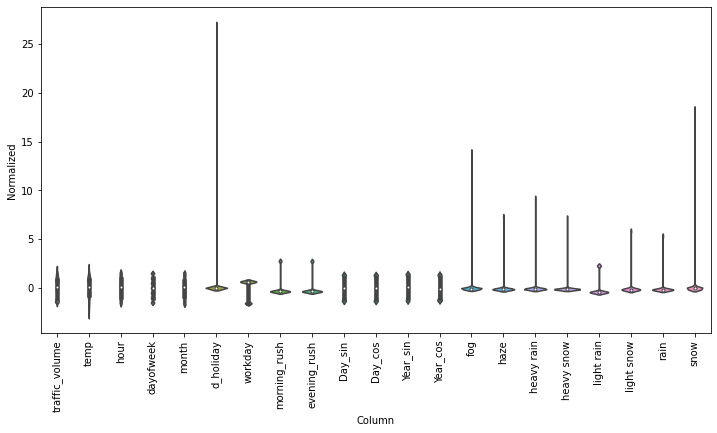

In [ ]:
##From the TensorFlow Tutorial

# check distributions 
df_std = (df_num2 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_num2.keys(), rotation=90)

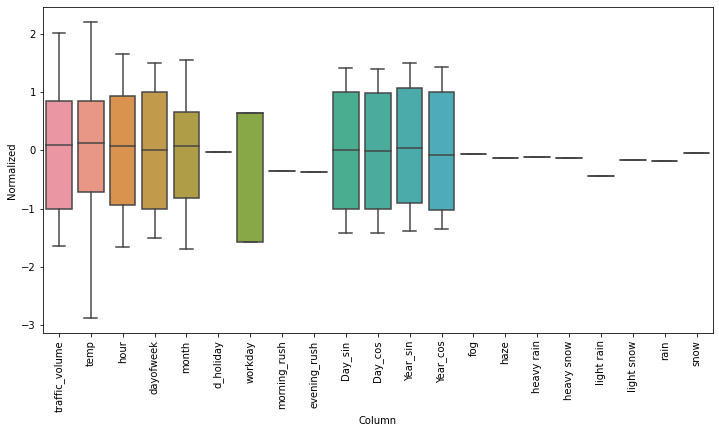

In [ ]:
#plot without outliers 

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Column', y='Normalized', data=df_std, showfliers = False)
_ = ax.set_xticklabels(df_num2.keys(), rotation=90)

# Window Generator and other Functions/Classes

In [ ]:
##From the TensorFlow Tutorial

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
##From the TensorFlow Tutorial

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
##From the TensorFlow Tutorial

def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
##From the TensorFlow Tutorial

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
##From the TensorFlow Tutorial

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
##From the TensorFlow Tutorial

MAX_EPOCHS = 20
column_indices = {name: i for i, name in enumerate(df_num2.columns)}
num_features = df_num2.shape[1]

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

# Single-Output Model 
Baseline model - 1 LSTM layer with default settings 

Total window size: 10
Input indices: [0 1 2 3 4 5 6]
Label indices: [9]
Label column name(s): ['traffic_volume']

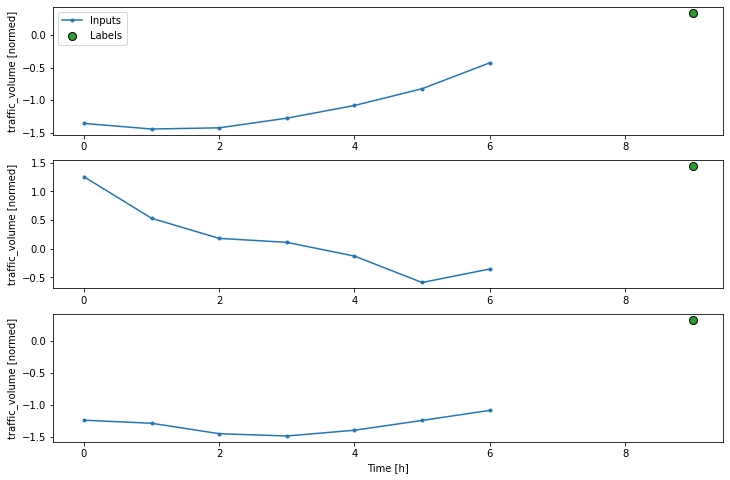

In [ ]:
window_7_1_3 = WindowGenerator(
    input_width=7, label_width=1, shift=3,
    label_columns=['traffic_volume'])

window_7_1_3.plot()
window_7_1_3

In [ ]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([1, 1])
])

In [ ]:
print('Input shape:', window_7_1_3.example[0].shape)
print('Output shape:', lstm_model(window_7_1_3.example[0]).shape)

Input shape: (32, 7, 21)
Output shape: (32, 1, 1)


In [ ]:
lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=10, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

In [ ]:
print('Train_MAE:', history.history['mean_absolute_error'][-1])
print('Val_MAE:  ', history.history['val_mean_absolute_error'][-1])
print('Test_MAE: ', lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1])

Train_MAE: 0.19322408735752106
Val_MAE:   0.16483460366725922
Test_MAE:  0.1295919567346573


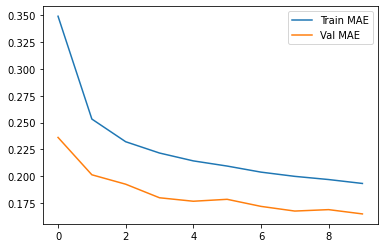

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

# Model Tuning 
model architecture - layers, dropout, etc

## Tuning steps

In [ ]:
df_test_results = pd.DataFrame(columns = ['LSTM_layers', 'Conv_layers', 'Dense_layers', 'Units', 'Epochs', 'Batch_size', 'Dropout','Bidirect',
                                          'Train_MAE', 'Val_MAE','Test_MAE','History'])

# add baseline model results 
df_test_results = df_test_results.append({"LSTM_layers":1, "Conv_layers":0, "Dense_layers":1, "Units":32, "Epochs":20,'Batch_size':32, 'Dropout':0.0, 'Bidirect':False,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)
df_test_results

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...


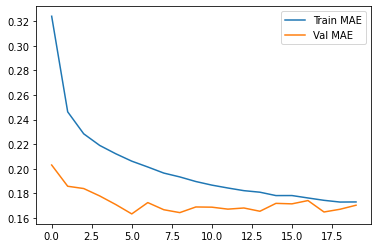

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...


In [ ]:
# Try Bidirectional LSTM 

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 1    #lstm layers
c = 0    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False, dropout=d)),
    tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Test MAE is higher but less overfitting 

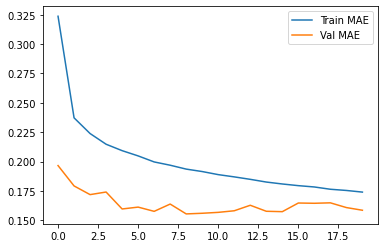

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...


In [ ]:
# Try Convolutional layer

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 1    #lstm layers
c = 1    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=(7,), activation='relu'),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False, dropout=d)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Lowest Val MAE and Test MAE 

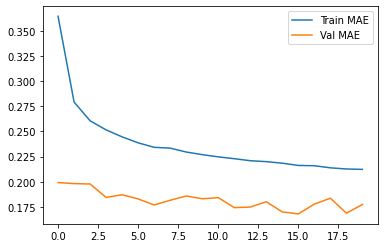

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...


In [ ]:
# Add dropout to Conv layer

u = 32   #units
b = 32   #batch size 
d = 0.3  #dropout 
e = 20   #epochs 
l = 1    #lstm layers
c = 1    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=(7,), activation='relu'),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Dropout on Conv layer did not help 

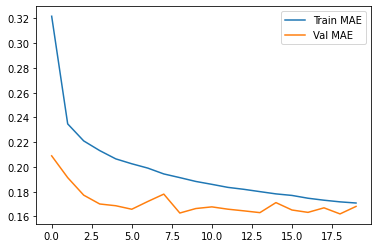

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...


In [ ]:
# Revert Dropout back to 0, add another LSTM layer 

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 2    #lstm layers
c = 1    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=(7,), activation='relu'),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Not better but not the worst 

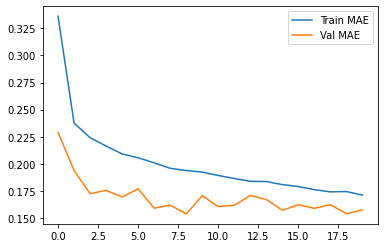

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...
5,3,1,1,32,20,32,0.0,True,0.171087,0.157341,0.138747,<keras.callbacks.History object at 0x7fbd686b8...


In [ ]:
# Add another LSTM layer 

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 3    #lstm layers
c = 1    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=(7,), activation='relu'),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Not much change 

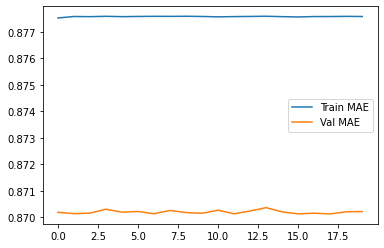

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...
5,3,1,1,32,20,32,0.0,True,0.171087,0.157341,0.138747,<keras.callbacks.History object at 0x7fbd686b8...
6,3,1,2,32,20,32,0.0,True,0.877580,0.870214,0.876628,<keras.callbacks.History object at 0x7fbd5807e...


In [ ]:
# Add another Dense layer 

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 3    #lstm layers
c = 1    #conv layers 
dl= 2    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=(7,), activation='relu'),
  tf.keras.layers.Dropout(d),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Significantly worse performance 

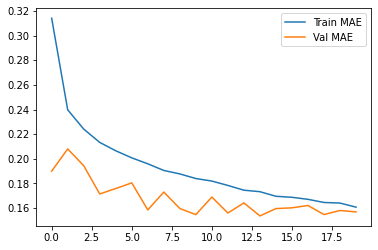

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...
5,3,1,1,32,20,32,0.0,True,0.171087,0.157341,0.138747,<keras.callbacks.History object at 0x7fbd686b8...
6,3,1,2,32,20,32,0.0,True,0.877580,0.870214,0.876628,<keras.callbacks.History object at 0x7fbd5807e...
7,2,0,1,32,20,32,0.0,True,0.160661,0.156811,0.129804,<keras.callbacks.History object at 0x7fbcc7c4a...


In [ ]:
# 2 LSTM no conv

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 2    #lstm layers
c = 0    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Improvement over 1 LSTM but not over 1 LSTM 1 Conv

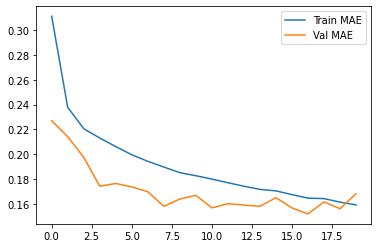

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...
5,3,1,1,32,20,32,0.0,True,0.171087,0.157341,0.138747,<keras.callbacks.History object at 0x7fbd686b8...
6,3,1,2,32,20,32,0.0,True,0.877580,0.870214,0.876628,<keras.callbacks.History object at 0x7fbd5807e...
7,2,0,1,32,20,32,0.0,True,0.160661,0.156811,0.129804,<keras.callbacks.History object at 0x7fbcc7c4a...
8,3,0,1,32,20,32,0.0,True,0.159346,0.168349,0.130367,<keras.callbacks.History object at 0x7fbd741a1...


In [ ]:
# 3 LSTM no conv

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 3    #lstm layers
c = 0    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

No improvement

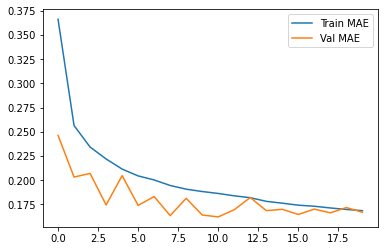

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...
5,3,1,1,32,20,32,0.0,True,0.171087,0.157341,0.138747,<keras.callbacks.History object at 0x7fbd686b8...
6,3,1,2,32,20,32,0.0,True,0.877580,0.870214,0.876628,<keras.callbacks.History object at 0x7fbd5807e...
7,2,0,1,32,20,32,0.0,True,0.160661,0.156811,0.129804,<keras.callbacks.History object at 0x7fbcc7c4a...
8,3,0,1,32,20,32,0.0,True,0.159346,0.168349,0.130367,<keras.callbacks.History object at 0x7fbd741a1...
9,3,0,1,32,20,32,0.0,False,0.168446,0.166833,0.135445,<keras.callbacks.History object at 0x7fbcb4cb1...


In [ ]:
# 3 LSTM without bidirectional

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 3    #lstm layers
c = 0    #conv layers 
dl= 1    #dense layers 
bi= False #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.LSTM(u, return_sequences=True),
  tf.keras.layers.LSTM(u, return_sequences=True),
  tf.keras.layers.LSTM(u, return_sequences=False),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

No improvement

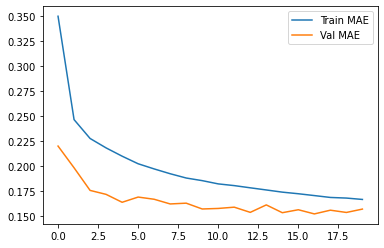

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...
5,3,1,1,32,20,32,0.0,True,0.171087,0.157341,0.138747,<keras.callbacks.History object at 0x7fbd686b8...
6,3,1,2,32,20,32,0.0,True,0.877580,0.870214,0.876628,<keras.callbacks.History object at 0x7fbd5807e...
7,2,0,1,32,20,32,0.0,True,0.160661,0.156811,0.129804,<keras.callbacks.History object at 0x7fbcc7c4a...
8,3,0,1,32,20,32,0.0,True,0.159346,0.168349,0.130367,<keras.callbacks.History object at 0x7fbd741a1...
9,3,0,1,32,20,32,0.0,False,0.168446,0.166833,0.135445,<keras.callbacks.History object at 0x7fbcb4cb1...


In [ ]:
# 2 LSTM without bidirectional

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 2    #lstm layers
c = 0    #conv layers 
dl= 1    #dense layers 
bi= False #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.LSTM(u, return_sequences=True),
  tf.keras.layers.LSTM(u, return_sequences=False),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

Best performance 

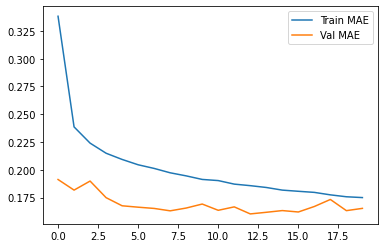

,LSTM_layers,Conv_layers,Dense_layers,Units,Epochs,Batch_size,Dropout,Bidirect,Train_MAE,Val_MAE,Test_MAE,History
0,1,0,1,32,20,32,0.0,False,0.193224,0.164835,0.129592,<keras.callbacks.History object at 0x7fbe04906...
1,1,0,1,32,20,32,0.0,True,0.173043,0.170370,0.151663,<keras.callbacks.History object at 0x7fbbe074f...
2,1,1,1,32,20,32,0.0,True,0.174069,0.158634,0.128799,<keras.callbacks.History object at 0x7fbc0ba64...
3,1,1,1,32,20,32,0.3,True,0.212291,0.177398,0.158708,<keras.callbacks.History object at 0x7fbd7521c...
4,2,1,1,32,20,32,0.0,True,0.170873,0.168120,0.138716,<keras.callbacks.History object at 0x7fbd74438...
5,3,1,1,32,20,32,0.0,True,0.171087,0.157341,0.138747,<keras.callbacks.History object at 0x7fbd686b8...
6,3,1,2,32,20,32,0.0,True,0.877580,0.870214,0.876628,<keras.callbacks.History object at 0x7fbd5807e...
7,2,0,1,32,20,32,0.0,True,0.160661,0.156811,0.129804,<keras.callbacks.History object at 0x7fbcc7c4a...
8,3,0,1,32,20,32,0.0,True,0.159346,0.168349,0.130367,<keras.callbacks.History object at 0x7fbd741a1...
9,3,0,1,32,20,32,0.0,False,0.168446,0.166833,0.135445,<keras.callbacks.History object at 0x7fbcb4cb1...


In [ ]:
# 2 LSTM without bidirectional and 1 conv

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 2    #lstm layers
c = 1    #conv layers 
dl= 1    #dense layers 
bi= False #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=(7,), activation='relu'),
  tf.keras.layers.LSTM(u, return_sequences=True),
  tf.keras.layers.LSTM(u, return_sequences=False),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

df_test_results = df_test_results.append({"LSTM_layers":l, "Conv_layers":c, "Dense_layers":dl, "Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d, 'Bidirect':bi,
                                          'Train_MAE':history.history['mean_absolute_error'][-1], 
                                          'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                          'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                          'History':history}, ignore_index=True)

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

df_test_results

## Best model structure based on lower MAE on Val/Test and also lower overfitting 
- 2 LSTM with Bidirectional, 0 Conv, 1 Dense

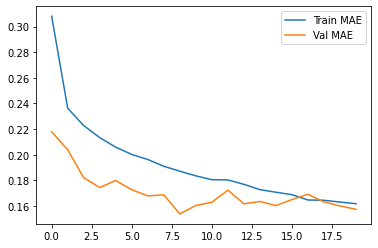

Train_MAE:  0.16179998219013214
Val_MAE:    0.1574583351612091
Test_MAE:   0.1278855949640274


In [ ]:
# 2 LSTM no conv

u = 32   #units
b = 32   #batch size 
d = 0.0  #dropout 
e = 20   #epochs 
l = 2    #lstm layers
c = 0    #conv layers 
dl= 1    #dense layers 
bi= True #bidirectional

lstm_model = tf.keras.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False)),
  tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
  tf.keras.layers.Reshape([1, 1])
])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

IPython.display.clear_output()

plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

print('Train_MAE: ',history.history['mean_absolute_error'][-1])
print('Val_MAE:   ',history.history['val_mean_absolute_error'][-1])
print('Test_MAE:  ',lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1])

# Hyperparameter Tuning Loop

In [ ]:
# Try different values 

df_test_results = pd.DataFrame(columns = ['Units', 'Epochs', 'Batch_size', 'Dropout',
                                          'Train_MAE', 'Val_MAE','Test_MAE','History'])

units_vals = [32, 64, 128]
batch_vals = [32, 64, 128]
ep_vals = [10, 20]
do_vals = [0.0, 0.2, 0.4]

for u in units_vals: 
  for b in batch_vals:
    for e in ep_vals: 
      for d in do_vals:
        print('units:',u,', batch:',b,', epochs:',e,', dropout:',d)

        lstm_model = tf.keras.Sequential([
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True, dropout=d)),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False, dropout=d)),
          tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
          tf.keras.layers.Reshape([1, 1])
        ])

        lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
        history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val)  

        IPython.display.clear_output()

        df_test_results = df_test_results.append({"Units":u, "Epochs":e,'Batch_size':b, 'Dropout':d,
                                                      'Train_MAE':history.history['mean_absolute_error'][-1], 
                                                      'Val_MAE':history.history['val_mean_absolute_error'][-1],
                                                      'Test_MAE':lstm_model.evaluate(window_7_1_3.test, verbose=0)[-1],
                                                      'History':history}, ignore_index=True)


In [ ]:
df_test_results

,Units,Epochs,Batch_size,Dropout,Train_MAE,Val_MAE,Test_MAE,History
0,32,10,32,0.0,0.182088,0.146277,0.122319,<keras.callbacks.History object at 0x7fbca4b08...
1,32,10,32,0.2,0.230223,0.157714,0.128652,<keras.callbacks.History object at 0x7fbca4b74...
2,32,10,32,0.4,0.259292,0.161927,0.140860,<keras.callbacks.History object at 0x7fbc9e7fc...
3,32,20,32,0.0,0.161795,0.166865,0.143686,<keras.callbacks.History object at 0x7fbbfd7e5...
4,32,20,32,0.2,0.208754,0.146173,0.119792,<keras.callbacks.History object at 0x7fbbfb07c...
5,32,20,32,0.4,0.236246,0.150946,0.134941,<keras.callbacks.History object at 0x7fbca5658...
6,32,10,64,0.0,0.182803,0.158976,0.133466,<keras.callbacks.History object at 0x7fbcaa64c...
7,32,10,64,0.2,0.229085,0.158387,0.128978,<keras.callbacks.History object at 0x7fbbf81ec...
8,32,10,64,0.4,0.255861,0.170457,0.143098,<keras.callbacks.History object at 0x7fbbf699e...
9,32,20,64,0.0,0.161657,0.164101,0.128472,<keras.callbacks.History object at 0x7fbbf51b1...


## Best Model from Hyper parameter tuning 

In [ ]:
u = 64  
e =	20
b = 32
d = 0.2

lstm_model = tf.keras.Sequential([
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=True, dropout=d)),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(u, return_sequences=False, dropout=d)),
          tf.keras.layers.Dense(1*1, kernel_initializer=tf.initializers.zeros()),
          tf.keras.layers.Reshape([1, 1])
        ])

lstm_model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
history = lstm_model.fit(window_7_1_3.train, epochs=e, batch_size=b, validation_data=window_7_1_3.val, verbose=1)  

IPython.display.clear_output()


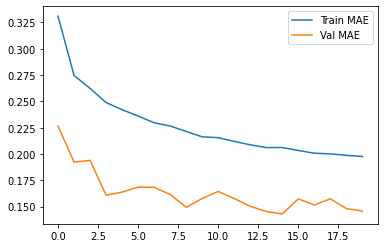

In [ ]:
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.show()

# Predictions

In [ ]:
# make predictions
#yhat = multi_lstm_model.predict(window_7_1_3.test)
yhat = lstm_model.predict(window_7_1_3.test)
yhat.shape

(4991, 1, 1)

In [ ]:
# reshape 
preds = yhat.reshape(yhat.shape[0], yhat.shape[2])

# convert to dataframe 
predictions = pd.DataFrame(preds, columns = ['prediction'])
predictions.head()

,prediction
0,0.896439
1,0.051826
2,0.737286
3,-1.037128
4,-0.851298


In [ ]:
# de-normalize 

inv_preds = (predictions*train_std['traffic_volume']) + train_mean['traffic_volume']
inv_preds.head()

,prediction
0,5041.057129
1,3360.797119
2,4724.439941
3,1194.448730
4,1564.135010


In [ ]:
# create dataframe for submission 

#pred_tv = inv_preds[['traffic_volume']].copy()
inv_preds['id'] = inv_preds.index+1
id = inv_preds['id']
inv_preds.drop(labels=['id'], axis=1,inplace = True)
inv_preds.insert(0, 'id', id)
#inv_preds.rename(columns={"traffic_volume": "prediction"}, inplace=True)

inv_preds.head()

,id,prediction
0,1,5041.057129
1,2,3360.797119
2,3,4724.439941
3,4,1194.448730
4,5,1564.135010


In [ ]:
from google.colab import  drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
inv_preds.to_csv('/drive/My Drive/Academics/CSC 578/final/mw_preds_final_13.csv', index=False)